In [29]:

from google.colab import drive
import os
# Mount Google Drive
#drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/LEARN/Finance/quantitative finance/Project/Project-3_index_creation')
print(os.getcwd())


/content/drive/My Drive/LEARN/Finance/quantitative finance/Project/Project-3_index_creation


In [30]:
import numpy as np
from sqlalchemy import create_engine, text
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

import pandas as pd
from pandas.tseries.offsets import BMonthEnd, BDay
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

# Problem Statement

The project tries to build a MSCI inspired Momentum 50 index based on NIFTY 100 benchmark index.

ref : (https://www.msci.com/eqb/methodology/meth_docs/MSCI_Momentum_Indexes_Methodology_Aug2021.pdf)

# Static Data : Strategy to get NIFTY 50 momentum index from NIFTY 100 universe

## NIFTY 100 index price (Parent) [01/01/2003 - 18/02/2026]

In [31]:
'''
data = yf.download(
    "^CNX100",
    start="2003-01-01",
    end="2026-02-18",
    interval="1d",
    group_by="ticker",
    auto_adjust=False,
    threads=True
)

data.reset_index(inplace=True)
data.to_excel("nifty100_index.xlsx")
data.head()
'''

'\ndata = yf.download(\n    "^CNX100",\n    start="2003-01-01",\n    end="2026-02-18",\n    interval="1d",\n    group_by="ticker",\n    auto_adjust=False,\n    threads=True\n)\n\ndata.reset_index(inplace=True)\ndata.to_excel("nifty100_index.xlsx")\ndata.head()\n'

URGENT - Num of NaN/NaT/None values 0


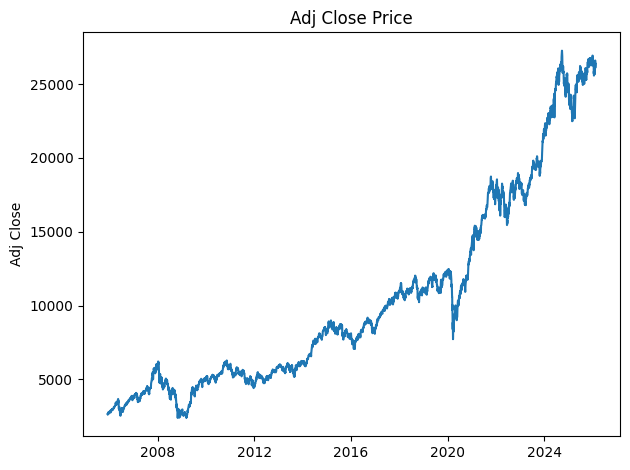

,Adj Close,return
Date,,
2005-12-01,2649.750000,0.017139
2005-12-02,2652.300049,0.000962
2005-12-05,2619.699951,-0.012291
2005-12-06,2618.600098,-0.000420
2005-12-07,2646.350098,0.010597


In [32]:
df_index = pd.read_excel("nifty100_index.xlsx" , skiprows=[0,2])
df_index.rename(columns={'Unnamed: 1': 'Date'}, inplace=True)
df_index.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume', 'Price'], inplace=True)
print ('URGENT - Num of NaN/NaT/None values', df_index.isna().sum().sum())

df_index = df_index.set_index("Date")
df_index = df_index.sort_index()
#df_index = df_index.ffill()
#print("Remaining NaNs:", df_index.isna().sum().sum())

df_index["return"] = df_index["Adj Close"].pct_change()
df_index.dropna(inplace=True)

# --- Adj Close ---
plt.plot(df_index["Adj Close"])
plt.ylabel("Adj Close")
plt.title("Adj Close Price")

plt.tight_layout()
plt.show()

df_index.head()

## NIFTY 100 constituets info [01/01/2003 - 18/02/2026]

In [33]:
'''
import requests
from io import StringIO

url = "https://www.niftyindices.com/IndexConstituent/ind_nifty100list.csv"

# Some NSE endpoints require headers to succeed
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://www.nseindia.com/market-data/live-equity-market"
}

resp = requests.get(url, headers=headers)
df_list = pd.read_csv(StringIO(resp.text))

symbols = df_list["Symbol"].tolist()
yf_symbols = [s + ".NS" for s in symbols]

print(yf_symbols)
'''

yf_symbols = ['ABB.NS', 'ADANIENSOL.NS', 'ADANIENT.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'ADANIPOWER.NS', 'AMBUJACEM.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS', 'DMART.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BAJAJHLDNG.NS', 'BAJAJHFL.NS', 'BANKBARODA.NS', 'BEL.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'BOSCHLTD.NS', 'BRITANNIA.NS', 'CGPOWER.NS', 'CANBK.NS', 'CHOLAFIN.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DLF.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'ETERNAL.NS', 'GAIL.NS', 'GODREJCP.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HAVELLS.NS', 'HINDALCO.NS', 'HAL.NS', 'HINDUNILVR.NS', 'HINDZINC.NS', 'HYUNDAI.NS', 'ICICIBANK.NS', 'ICICIGI.NS', 'ITC.NS', 'INDHOTEL.NS', 'IOC.NS', 'IRFC.NS', 'NAUKRI.NS', 'INFY.NS', 'INDIGO.NS', 'JSWENERGY.NS', 'JSWSTEEL.NS', 'JINDALSTEL.NS', 'JIOFIN.NS', 'KOTAKBANK.NS', 'KWIL.NS', 'LTIM.NS', 'LT.NS', 'LICI.NS', 'LODHA.NS', 'M&M.NS', 'MARUTI.NS', 'MAXHEALTH.NS', 'MAZDOCK.NS', 'NTPC.NS', 'NESTLEIND.NS', 'ONGC.NS', 'PIDILITIND.NS', 'PFC.NS', 'POWERGRID.NS', 'PNB.NS', 'RECLTD.NS', 'RELIANCE.NS', 'SBILIFE.NS', 'MOTHERSON.NS', 'SHREECEM.NS', 'SHRIRAMFIN.NS', 'ENRIN.NS', 'SIEMENS.NS', 'SOLARINDS.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TVSMOTOR.NS', 'TCS.NS', 'TATACONSUM.NS', 'TMPV.NS', 'TATAPOWER.NS', 'TATASTEEL.NS', 'TECHM.NS', 'TITAN.NS', 'TORNTPHARM.NS', 'TRENT.NS', 'ULTRACEMCO.NS', 'UNITDSPR.NS', 'VBL.NS', 'VEDL.NS', 'WIPRO.NS', 'ZYDUSLIFE.NS']

In [34]:
'''
data = yf.download(
    yf_symbols,
    start="2003-01-01",
    end="2026-01-18",
    interval="1d",
    group_by="ticker",
    auto_adjust=False,
    threads=True
)

df_wide = pd.DataFrame({sym: data[sym]["Adj Close"] for sym in yf_symbols})
df_wide.to_excel("nifty100_equityprice.xlsx")
'''

'\ndata = yf.download(\n    yf_symbols,\n    start="2003-01-01",\n    end="2026-01-18",\n    interval="1d",\n    group_by="ticker",\n    auto_adjust=False,\n    threads=True\n)\n\ndf_wide = pd.DataFrame({sym: data[sym]["Adj Close"] for sym in yf_symbols})\ndf_wide.to_excel("nifty100_equityprice.xlsx")\n'

In [35]:
df_equityprice = pd.read_excel("nifty100_equityprice.xlsx")
print ('URGENT - Num of NaN/NaT/None values', df_equityprice.isna().sum().sum())
df_equityprice = df_equityprice.set_index("Date")
df_equityprice.head()

URGENT - Num of NaN/NaT/None values 117867


,ABB.NS,ADANIENSOL.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ADANIPOWER.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,DMART.NS,...,TECHM.NS,TITAN.NS,TORNTPHARM.NS,TRENT.NS,ULTRACEMCO.NS,UNITDSPR.NS,VBL.NS,VEDL.NS,WIPRO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-01,6.812234,NaN,0.046527,NaN,NaN,NaN,13.986336,44.802578,16.160059,NaN,...,NaN,3.377123,8.986462,11.459856,283.733551,NaN,NaN,0.455858,23.783369,11.854362
2003-01-02,6.835398,NaN,0.046656,NaN,NaN,NaN,14.267457,45.754929,16.253986,NaN,...,NaN,3.304945,8.979711,11.943260,283.824402,NaN,NaN,0.450295,23.539156,12.080729
2003-01-03,6.918507,NaN,0.046688,NaN,NaN,NaN,14.050225,46.051212,16.281576,NaN,...,NaN,3.230974,8.902080,11.856966,280.554657,NaN,NaN,0.443095,23.475414,12.356250
2003-01-06,7.156935,NaN,0.046366,NaN,NaN,NaN,13.884101,46.474480,16.358362,NaN,...,NaN,3.206764,9.221037,12.597064,280.554657,NaN,NaN,0.440150,23.875044,12.301192
2003-01-07,7.159662,NaN,0.046462,NaN,NaN,NaN,13.852157,47.088215,16.447817,NaN,...,NaN,3.171797,9.086027,11.808697,281.462891,NaN,NaN,0.442441,23.656601,12.035485


In [36]:
nan_matrix = pd.DataFrame({
    "num_nan": df_equityprice.isna().sum(),
    "first_non_nan_date": df_equityprice.apply(lambda x: x.first_valid_index())
})

# Sort by data availability (earliest first)
nan_matrix = nan_matrix.sort_values("first_non_nan_date")

nan_matrix_clean = nan_matrix.dropna(subset=["first_non_nan_date"])
yf_symbols = nan_matrix_clean.index.tolist()

print('no of constituents in parent universe', len(yf_symbols))

nan_matrix_clean

no of constituents in parent universe 100


,num_nan,first_non_nan_date
ABB.NS,1,2003-01-01
ONGC.NS,4,2003-01-01
NESTLEIND.NS,1,2003-01-01
M&M.NS,3,2003-01-01
LT.NS,1,2003-01-01
...,...,...
UNITDSPR.NS,5315,2024-05-30
BAJAJHFL.NS,5385,2024-09-16
HYUNDAI.NS,5410,2024-10-22
ENRIN.NS,5575,2025-06-19


### Approximate historical market cap

In [37]:
'''
def get_current_shares(symbol):
    try:
        t = yf.Ticker(symbol)
        return t.info.get("sharesOutstanding", np.nan)
    except Exception:
        return np.nan


shares_outstanding = {sym: get_current_shares(sym) for sym in yf_symbols}

df_shares = pd.Series(shares_outstanding, name="shares_outstanding")
df_shares.head()

iwf_matrix = np.random.uniform(0.10, 1.00, size=df_equityprice.shape)
df_ff_mcap = df_equityprice * df_shares * iwf_matrix

df_ff_mcap.to_excel("nifty100_equitymcap.xlsx")
'''

'\ndef get_current_shares(symbol):\n    try:\n        t = yf.Ticker(symbol)\n        return t.info.get("sharesOutstanding", np.nan)\n    except Exception:\n        return np.nan\n\n\nshares_outstanding = {sym: get_current_shares(sym) for sym in yf_symbols}\n\ndf_shares = pd.Series(shares_outstanding, name="shares_outstanding")\ndf_shares.head()\n\niwf_matrix = np.random.uniform(0.10, 1.00, size=df_equityprice.shape)\ndf_ff_mcap = df_equityprice * df_shares * iwf_matrix\n\ndf_ff_mcap.to_excel("nifty100_equitymcap.xlsx")\n'

In [38]:
df_equitymcap = pd.read_excel(
    "nifty100_equitymcap.xlsx",
    index_col=0,        # Date index
    parse_dates=True
)
df_equitymcap.head()

,ABB.NS,ADANIENSOL.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ADANIPOWER.NS,AMBUJACEM.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,...,TMPV.NS,TORNTPHARM.NS,TRENT.NS,TVSMOTOR.NS,ULTRACEMCO.NS,UNITDSPR.NS,VBL.NS,VEDL.NS,WIPRO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-01,1.265689e+09,NaN,1.783175e+07,NaN,NaN,NaN,2.685686e+10,6.410221e+09,3.876617e+09,3.005360e+09,...,NaN,7.461137e+08,5.488873e+08,3.932033e+09,5.060433e+10,NaN,NaN,1.078003e+09,8.956238e+10,7.333258e+09
2003-01-02,4.249756e+08,NaN,1.565485e+07,NaN,NaN,NaN,4.233987e+09,1.290639e+09,1.008323e+10,1.161533e+10,...,NaN,4.031308e+08,2.792522e+09,3.857412e+09,2.375705e+10,NaN,NaN,1.693404e+09,1.849596e+11,8.342292e+09
2003-01-03,1.196316e+09,NaN,4.410156e+07,NaN,NaN,NaN,2.552191e+10,6.077372e+09,1.305110e+10,1.732616e+10,...,NaN,8.846959e+08,3.892759e+09,8.814264e+09,7.820996e+10,NaN,NaN,8.534450e+08,4.930602e+10,1.137235e+10
2003-01-06,1.407442e+09,NaN,1.594980e+07,NaN,NaN,NaN,1.058201e+10,7.008191e+08,9.154529e+09,1.070679e+10,...,NaN,3.003810e+09,8.762631e+08,8.523291e+09,2.864368e+10,NaN,NaN,3.752289e+08,3.373133e+10,1.091265e+10
2003-01-07,5.924717e+08,NaN,1.107976e+07,NaN,NaN,NaN,3.083093e+10,4.298917e+09,2.240015e+09,1.637989e+10,...,NaN,1.286078e+09,2.507948e+09,5.339479e+09,3.821928e+10,NaN,NaN,1.721093e+09,9.834708e+10,5.551247e+09


## Initialize code

In [39]:
class BuildMomentumIndexStatic:

    def __init__(self, yf_symbols, df_index, df_equityprince, df_equitymcap, date_today, start = False, last_index_value = None, last_index_weight = None, last_parent_weight = None):

        self.trading_days = 250
        self.rfr = 6.5
        self.rfr_daily = (self.rfr / 100) / self.trading_days


        self.date_today = pd.Timestamp(date_today)

        self.yf_symbols = yf_symbols
        self.df_index = df_index
        self.df_equityprice = df_equityprice
        self.df_equitymcap = df_equitymcap

        self.adhoc_active = False
        self.start = start
        if self.start:
            self.index_value = None
            self.index_weight = None
            self.parent_weight = None

            self.mandatory_rebalancing()
        else:
            self.index_value = last_index_value
            self.index_weight = last_index_weight
            self.parent_weight = last_parent_weight

            if self.date_today == self.date_today + BMonthEnd(0) and self.date_today.month in [6, 12]:
                print ("Mandatory Rebalancing on ", self.date_today)
                self.mandatory_rebalancing()

            elif self.date_today == (self.date_today + BMonthEnd(0) - BDay(9)):
                 if self.adhoc_trigger():
                    print ("Adhoc Rebalancing on ", self.date_today)
                    self.adhoc_active = True
                    self.mandatory_rebalancing()

            self.no_rebalancing()

    # ------------------------------------------------------------------
    # MANDATORY REBALANCING
    # ------------------------------------------------------------------

    def mandatory_rebalancing(self):

        prices = self.df_equityprice.loc[:self.date_today].copy()

        # -----------------------------
        # Risk-free rate
        # -----------------------------
        rf = self.rfr_daily

        # -----------------------------
        # Lookback dates
        # -----------------------------
        t1  = self.date_today - BMonthEnd(1)
        t7  = self.date_today - BMonthEnd(7)
        t13 = self.date_today - BMonthEnd(13)

        # Align to available trading dates
        P_t1  = prices.loc[:t1].iloc[-1]
        P_t7  = prices.loc[:t7].iloc[-1]
        P_t13 = prices.loc[:t13].iloc[-1]

        # -----------------------------
        # Momentum
        # -----------------------------
        mom_6m  = (P_t1 / P_t7 - 1) - self.rfr * (0.5 / 100)
        mom_12m = (P_t1 / P_t13 - 1) - self.rfr * (1 / 100)

        # -----------------------------
        # Volatility (weekly)
        # -----------------------------
        weekly_prices = prices.resample("W-FRI").last()
        weekly_returns = weekly_prices.pct_change()

        sigma = weekly_returns.std() * np.sqrt(52)

        valid = (sigma > 0) & np.isfinite(sigma)

        # -----------------------------
        # Risk-adjusted momentum
        # -----------------------------
        ra_6m  = mom_6m / sigma
        ra_12m = mom_12m / sigma

        df = pd.DataFrame({
            "ra_6m": ra_6m,
            "ra_12m": ra_12m
        }).loc[valid]

        # -----------------------------
        # Z-scores
        # -----------------------------
        df["z_6m"]  = zscore(df["ra_6m"], nan_policy="omit")
        df["z_12m"] = zscore(df["ra_12m"], nan_policy="omit")

        # -----------------------------
        # Combined score
        # -----------------------------
        if self.adhoc_active:
            df["C"] = df["z_6m"]
        else:
            df["C"] = np.where(
                df["z_12m"].isna(),
                df["z_6m"],
                0.5 * df["z_6m"] + 0.5 * df["z_12m"]
            )

        # -----------------------------
        # Final Z + winsorisation
        # -----------------------------
        df["Z"] = zscore(df["C"], nan_policy="omit").clip(-3, 3)

        # -----------------------------
        # Momentum score transform
        # -----------------------------
        df["MomentumScore"] = np.where(
            df["Z"] >= 0,
            1 + df["Z"],
            1 / (1 - df["Z"])
        )

        # -----------------------------
        # MCAP + parent weights
        # -----------------------------
        mcap_today = self.df_equitymcap.loc[:self.date_today].iloc[-1]
        parent_cap = mcap_today.sum()
        parent_weight = mcap_today / parent_cap

        df["mcap"] = mcap_today
        df["parent_weight"] = parent_weight

        # -----------------------------
        # Ranking & selection
        # -----------------------------
        df = df.sort_values(
            ["MomentumScore", "parent_weight"],
            ascending=[False, False]
        )

        N = 50
        df = df.iloc[:N]

        # -----------------------------
        # Weighting
        # -----------------------------
        df["MomentumWeight"] = (
            df["MomentumScore"] * df["parent_weight"] * df["mcap"]
        )

        df["FinalWeight"] = df["MomentumWeight"] / df["MomentumWeight"].sum()

        df["InclusionFactor"] = df["FinalWeight"] / df["parent_weight"]

        # -----------------------------
        # Issuer cap
        # -----------------------------
        max_parent_weight = df["parent_weight"].max()
        issuer_cap = 0.05 if max_parent_weight <= 0.10 else max_parent_weight

        df["FinalWeightCapped"] = df["FinalWeight"].clip(upper=issuer_cap)
        df["FinalWeightCapped"] /= df["FinalWeightCapped"].sum()

        # -----------------------------
        # Store
        # -----------------------------
        self.index_weight = df["FinalWeightCapped"].copy()
        self.parent_weight = df["parent_weight"].copy()


    # ------------------------------------------------------------------
    # Adhoc rebalancing
    # ------------------------------------------------------------------
    def adhoc_trigger(self):
        index_data = self.df_index.loc[:self.date_today]
        index_returns = index_data["return"]

        # Current volatility
        T9 = self.date_today - BDay(9)

        prev_month_end = (T9 - BMonthEnd(1))
        start_date = prev_month_end - pd.DateOffset(months=3)
        window = index_returns.loc[start_date:prev_month_end]

        Vt = np.sqrt(self.trading_days) * window.std()

        # Previous month's T-9
        prev_T9 = T9 - pd.DateOffset(months=1)

        prev_month_end = (prev_T9 - BMonthEnd(1))
        start_date = prev_month_end - pd.DateOffset(months=3)
        window = index_returns.loc[start_date:prev_month_end]
        Vt_1 = np.sqrt(250) * window.std()

        if not np.isfinite(Vt) or not np.isfinite(Vt_1):
            return False

        delta = (Vt / Vt_1) - 1

        # Reference index threshold (95th percentile of historical deltas)
        reference_index_returns = self.df_index["return"]
        ref_vol = (reference_index_returns.rolling(int(self.trading_days/12)).std().dropna() * np.sqrt(self.trading_days))
        ref_delta = ref_vol.pct_change().dropna()
        threshold = np.percentile(ref_delta, 95)

        return delta > threshold

    # ------------------------------------------------------------------
    # No rebalancing
    # ------------------------------------------------------------------
    def no_rebalancing(self):

        # Get required dates
        today = self.date_today
        prev_day = today - BDay(1)

        # Prices
        Pt = self.df_equityprice.loc[:today].iloc[-1]
        Pt_1 = self.df_equityprice.loc[:prev_day].iloc[-1]

        # Ensure alignment
        Pt, Pt_1 = Pt.align(Pt_1, join="inner")

        # Index weights (Series indexed by Symbol)
        weights = pd.Series(self.index_weight)

        # Align weights with prices
        weights = weights.reindex(Pt.index)

        # Daily index return
        weighted_return = (weights * (Pt / Pt_1)).sum()

        # Update index value
        self.index_value *= weighted_return

    # ------------------------------------------------------------------
    # RETURN
    # ------------------------------------------------------------------
    def get_data(self):
        return self.index_value, self.index_weight, self.parent_weight


In [56]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


class IndexPerformanceAnalytics:
    """
    Performance analytics for Benchmark vs Strategy
    using daily 'Adj Close' prices
    """

    def __init__(self, df_benchmark, df_strategy, trading_days=250, rfr=6.5):

        self.trading_days = trading_days
        self.rfr = rfr
        self.rfr_daily = (rfr / 100) / trading_days

        self.df = pd.concat(
            [
                df_benchmark["Adj Close"].rename("Benchmark"),
                df_strategy["Adj Close"].rename("Strategy"),
            ],
            axis=1
        ).dropna()

        self.returns = self.df.pct_change().dropna()

    # -------------------------------------------------
    # PERIOD SLICER
    # -------------------------------------------------
    def _slice_period(self, period):

        end = self.df.index[-1]

        mapping = {
            "Last Month": pd.DateOffset(months=1),
            "YTD": pd.Timestamp(year=end.year, month=1, day=1),
            "1Y": pd.DateOffset(years=1),
            "3Y": pd.DateOffset(years=3),
            "5Y": pd.DateOffset(years=5),
            "10Y": pd.DateOffset(years=10),
        }

        if period == "YTD":
            start = mapping[period]
        else:
            start = end - mapping[period]

        df_slice = self.df.loc[start:end]
        returns_slice = df_slice.pct_change().dropna()

        return df_slice, returns_slice

    # -------------------------------------------------
    # CORE METRICS
    # -------------------------------------------------
    def _cagr(self, series):
        n_years = (series.index[-1] - series.index[0]).days / 365.25
        return (series.iloc[-1] / series.iloc[0]) ** (1 / n_years) - 1

    def capm_regression(self, returns):

        excess_strategy = returns["Strategy"] - self.rfr_daily
        excess_benchmark = returns["Benchmark"] - self.rfr_daily

        X = sm.add_constant(excess_benchmark)
        model = sm.OLS(excess_strategy, X).fit()

        beta = model.params["Benchmark"]
        alpha_annual = model.params["const"] * self.trading_days

        return beta, alpha_annual

    def _safe_sharpe(self, excess_returns):
        vol = excess_returns.std(ddof=1)
        if vol < 1e-15:   # numerical stability threshold
            return "-"
        return (np.sqrt(self.trading_days) * excess_returns.mean() / vol).round(2)
    # -------------------------------------------------
    # PERIOD SUMMARY
    # -------------------------------------------------
    def summary_by_period(self):

        periods = ["Last Month", "YTD", "1Y", "3Y", "5Y", "10Y"]
        rows = []

        for p in periods:

            df_p, ret_p = self._slice_period(p)

            if len(ret_p) < 20:
                continue

            beta, alpha = self.capm_regression(ret_p)

            active = ret_p["Strategy"] - ret_p["Benchmark"]

            excess_benchmark = ret_p["Benchmark"] - self.rfr_daily
            excess_strategy = ret_p["Strategy"] - self.rfr_daily

            # ---- Momentum / Strategy row ----
            rows.append(pd.Series({
                "Period": p,
                "Asset": "Momentum",
                #"CAGR (%)": self._cagr(df_p["Strategy"]) * 100,
                "Annual Return (%)": ret_p["Strategy"].mean() * self.trading_days * 100,
                "Annual Vol (%)": ret_p["Strategy"].std(ddof=1) * np.sqrt(self.trading_days) * 100,
                "Sharpe Ratio": self._safe_sharpe(excess_strategy),
                "Correlation": ret_p["Strategy"].corr(ret_p["Benchmark"]),
                "CAPM Beta (OLS)": beta,
                "CAPM Alpha (OLS, % annual)": alpha,
                "TE (% annual)": active.std(ddof=1) * np.sqrt(self.trading_days) * 100,
                "IR (annual)": np.sqrt(self.trading_days) * active.mean() / active.std(ddof=1),
            }))

            # ---- Benchmark row ----
            rows.append(pd.Series({
                "Period": p,
                "Asset": "Benchmark",
                #"CAGR (%)": self._cagr(df_p["Benchmark"]) * 100,
                "Annual Return (%)": ret_p["Benchmark"].mean() * self.trading_days * 100,
                "Annual Vol (%)": ret_p["Benchmark"].std(ddof=1) * np.sqrt(self.trading_days) * 100,
                "Sharpe Ratio": self._safe_sharpe(excess_benchmark),
                "Correlation": np.nan,
                "CAPM Beta (OLS)": np.nan,
                "CAPM Alpha (OLS, % annual)": np.nan,
                "TE (% annual)": np.nan,
                "IR (annual)": np.nan,
            }))



        summary = pd.DataFrame(rows)
        summary.set_index(["Period", "Asset"], inplace=True)

        summary = summary.round(2)
        summary = summary.fillna("-")

        return summary

    # -------------------------------------------------
    # PLOTTING
    # -------------------------------------------------
    def plot_levels(self, normalised=True):

        if normalised:
            df_plot = self.df / self.df.iloc[0] * 100
            title = "Index Performance (Normalised)"
        else:
            df_plot = self.df
            title = "Index Levels"

        plt.figure(figsize=(12, 6))
        plt.plot(df_plot.index, df_plot["Benchmark"], label="Benchmark")
        plt.plot(df_plot.index, df_plot["Strategy"], label="Strategy")
        plt.legend()
        plt.grid(True)
        plt.title(title)
        plt.show()

# FINAL RUN

In [41]:
start_date = start_date = pd.Timestamp('2016-01-01')
start_value = 8118.15

benchmark100 = df_index["Adj Close"].loc[start_date:].to_frame(name="Adj Close")
momentum50 = pd.DataFrame(index=benchmark100.index, columns=["Adj Close"], dtype=float)
benchmark100.head()

,Adj Close
Date,
2016-01-01,8118.149902
2016-01-04,7957.899902
2016-01-05,7959.850098
2016-01-06,7918.750000
2016-01-07,7731.649902


In [42]:
BMI_init = BuildMomentumIndexStatic(yf_symbols, df_index, df_equityprice, df_equitymcap, start_date, start = True)
BMI_init.index_value = start_value
present_index_value, present_index_weight, present_parent_weight = BMI_init.get_data()
present_index_value = start_value

momentum50.loc[start_date, "Adj Close"] = present_index_value

# Use df_index calendar
index_calendar = benchmark100.index

for dt in index_calendar:

    BMI_dt = BuildMomentumIndexStatic(
        yf_symbols,
        df_index,
        df_equityprice,
        df_equitymcap,
        dt,
        start=False,
        last_index_value=present_index_value,
        last_index_weight=present_index_weight,
        last_parent_weight=present_parent_weight
    )

    present_index_value, present_index_weight, present_parent_weight = BMI_dt.get_data()

    momentum50.loc[dt, "Adj Close"] = present_index_value

momentum50.tail()

Adhoc Rebalancing on  2016-02-16 00:00:00
Adhoc Rebalancing on  2016-03-18 00:00:00
Adhoc Rebalancing on  2016-04-18 00:00:00
Mandatory Rebalancing on  2016-06-30 00:00:00
Adhoc Rebalancing on  2016-12-19 00:00:00
Mandatory Rebalancing on  2016-12-30 00:00:00
Mandatory Rebalancing on  2017-06-30 00:00:00
Adhoc Rebalancing on  2017-09-18 00:00:00
Adhoc Rebalancing on  2017-10-18 00:00:00
Mandatory Rebalancing on  2017-12-29 00:00:00
Adhoc Rebalancing on  2018-03-19 00:00:00
Mandatory Rebalancing on  2018-06-29 00:00:00
Adhoc Rebalancing on  2018-11-19 00:00:00
Mandatory Rebalancing on  2018-12-31 00:00:00
Adhoc Rebalancing on  2019-06-17 00:00:00
Mandatory Rebalancing on  2019-06-28 00:00:00
Adhoc Rebalancing on  2019-10-18 00:00:00
Mandatory Rebalancing on  2019-12-31 00:00:00
Adhoc Rebalancing on  2020-03-18 00:00:00
Adhoc Rebalancing on  2020-04-17 00:00:00
Adhoc Rebalancing on  2020-05-18 00:00:00
Mandatory Rebalancing on  2020-06-30 00:00:00
Mandatory Rebalancing on  2020-12-31 00:

,Adj Close
Date,
2026-02-11,32244.230664
2026-02-12,32244.230664
2026-02-13,32244.230664
2026-02-16,32244.230664
2026-02-17,32244.230664


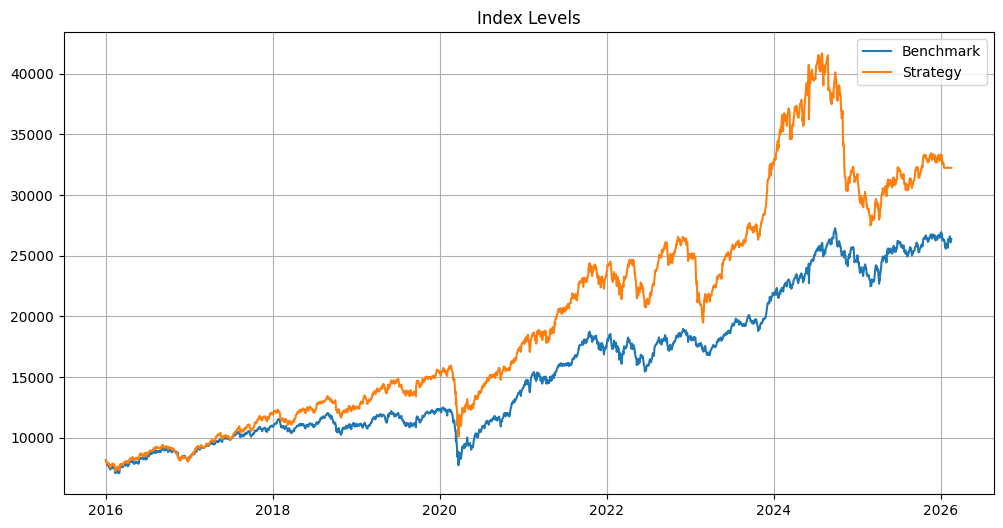

Annual Return (%)  Annual Vol (%) Sharpe Ratio  \
Period     Asset                                                       
Last Month Momentum                0.00            0.00            -   
           Benchmark              10.24           14.88         0.25   
YTD        Momentum              -28.10            4.94         -7.0   
           Benchmark             -16.40           12.89        -1.78   
1Y         Momentum               12.05           11.92         0.47   
           Benchmark              13.17           11.96         0.56   
3Y         Momentum               16.16           17.11         0.56   
           Benchmark              14.35           12.49         0.63   
5Y         Momentum               12.86           17.73         0.36   
           Benchmark              12.03           13.92          0.4   
10Y        Momentum               16.50           18.13         0.55   
           Benchmark              14.50           16.01          0.5   

                     Correlation CAPM Beta (OLS) CAPM Alpha (OLS, % annual)  \
Period     Asset                                                              
Last Month Momentum        -0.18            -0.0                      -0.06   
           Benchmark           -               -                          -   
YTD        Momentum         0.22            0.08                      -0.33   
           Benchmark           -               -                          -   
1Y         Momentum         0.87            0.87                       -0.0   
           Benchmark           -               -                          -   
3Y         Momentum         0.82            1.12                       0.01   
           Benchmark           -               -                          -   
5Y         Momentum         0.85            1.08                        0.0   
           Benchmark           -               -                          -   
10Y        Momentum         0.89            1.01                       0.02   
           Benchmark           -               -                          -   

                     TE (% annual) IR (annual)  
Period     Asset                                
Last Month Momentum          14.88       -0.69  
           Benchmark             -           -  
YTD        Momentum          12.74       -0.92  
           Benchmark             -           -  
1Y         Momentum           5.97       -0.19  
           Benchmark             -           -  
3Y         Momentum           9.96        0.18  
           Benchmark             -           -  
5Y         Momentum           9.36        0.09  
           Benchmark             -           -  
10Y        Momentum           8.35        0.24  
           Benchmark             -           -

In [57]:
analytics = IndexPerformanceAnalytics(df_benchmark=benchmark100, df_strategy=momentum50)
analytics.plot_levels(normalised=False)

analytics.summary_by_period()